In [57]:
# LINEAR REGRESSION

import sys
import pandas
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# URL AND COLUMNS
url = "https://data.austintexas.gov/resource/fdj4-gpfu.csv"
names = ['occ_date_time', 'crime_type']
top_ten_crimes = set(['BURGLARY OF VEHICLE', 'THEFT', 'FAMILY DISTURBANCE', 'CRIMINAL MISCHIEF','THEFT BY SHOPLIFTING', 'POSS CONTROLLED SUB/NARCOTIC', 'AUTO THEFT', 'DWI', 
                      'ASSAULT W/INJURY-FAM/DATE VIOL', 'HARASSMENT'])
dataset = pandas.read_csv(url, usecols=names, nrows=1000)
dataset = dataset[dataset['crime_type'].isin(top_ten_crimes)]

# CONVERT DATE TIME TO FLOAT
dataset['occ_date_time'] = pandas.to_datetime(dataset['occ_date_time'])
dataset['occ_date_time'] = dataset.occ_date_time.astype('int64') // 10 ** 9

# PROCESS CRIME TYPE INTO COLUMNS OF TOP 10 CRIMES
crime_cols = pd.get_dummies(dataset['crime_type'])
dataset = dataset.drop('crime_type', axis = 1)
dataset = dataset.join(crime_cols)

# DIVIDE COLUMNS INTO TIME AND CRIME TYPES
x = dataset[['BURGLARY OF VEHICLE', 'THEFT', 'FAMILY DISTURBANCE', 'CRIMINAL MISCHIEF','THEFT BY SHOPLIFTING', 'POSS CONTROLLED SUB/NARCOTIC', 'AUTO THEFT', 'DWI', 
                      'ASSAULT W/INJURY-FAM/DATE VIOL', 'HARASSMENT']].values
y = dataset['occ_date_time'].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
# SPLIT 80% OF THE DATA AS THE TRAINING SET
# WHILE 20% OF THE DATA AS TEST SET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# TRAIN THE ALGORITHM
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, ['BURGLARY OF VEHICLE',
                                          'THEFT',
                                          'FAMILY DISTURBANCE',
                                          'CRIMINAL MISCHIEF',
                                          'THEFT BY SHOPLIFTING',
                                          'POSS CONTROLLED SUB/NARCOTIC',
                                          'AUTO THEFT',
                                          'DWI', 
                                          'ASSAULT W/INJURY-FAM/DATE VIOL',
                                          'HARASSMENT'], 
                                           columns=['Coefficient'])  
coeff_df

,Coefficient
BURGLARY OF VEHICLE,33249.117276
THEFT,20753.142434
FAMILY DISTURBANCE,-52581.993835
CRIMINAL MISCHIEF,-4497.189030
THEFT BY SHOPLIFTING,4557.946105
POSS CONTROLLED SUB/NARCOTIC,-47580.369903
AUTO THEFT,23265.783943
DWI,19581.001334
ASSAULT W/INJURY-FAM/DATE VIOL,-11154.650840
HARASSMENT,14407.212515


In [46]:
# MAKE PREDICTIONS
y_pred = regressor.predict(x_test)

# Compare the actual output values for x_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,1580797980,1.580869e+09
1,1581104700,1.580950e+09
2,1580823000,1.580937e+09
3,1581072060,1.580931e+09
4,1580851800,1.580931e+09
5,1581005700,1.580922e+09
6,1580769060,1.580864e+09
7,1580751840,1.580938e+09
8,1581137580,1.580940e+09
9,1580762700,1.580922e+09


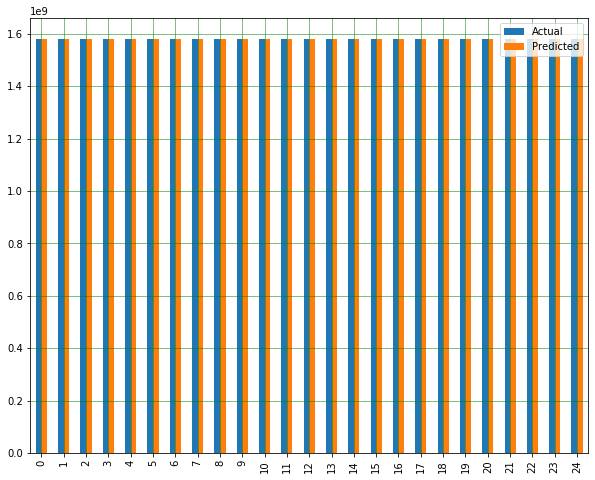

In [47]:
# GRAPH THE COMPARISON / MODEL ACCURACY
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [48]:
# Evaluate the performance of the algorithm. 
# We’ll do this by finding the values for MAE, MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 103241.63348213457
Mean Squared Error: 13655072343.797176
Root Mean Squared Error: 116854.92006670996
